In [1]:
#Import thư viện 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from underthesea import word_tokenize, pos_tag, sent_tokenize
import warnings
from gensim import corpora, models, similarities
import re
import time
import regex
from pandas_profiling import ProfileReport
from wordcloud import WordCloud

C:\Users\Admin\AppData\Local\Temp\ipykernel_7664\191769195.py:14: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# Đọc dữ liệu
df2=pd.read_csv('San_pham.csv')

In [3]:
# Xem vài dòng
df2.head(10)

,ma_san_pham,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,diem_trung_binh
0,318900012,Nước Hoa Hồng Klairs Không Mùi Cho Da Nhạy Cảm...,209000,435000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8
1,205100137,"Nước Tẩy Trang L'Oreal Tươi Mát Cho Da Dầu, Hỗ...",147000,229000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7
2,422208973,Sữa Rửa Mặt CeraVe Sạch Sâu Cho Da Thường Đến ...,343000,455000.0,88ml\n236ml\n473ml\nDa khô/Hỗn hợp khô\nDa dầu...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,4.9
3,204900013,Kem Chống Nắng La Roche-Posay Kiểm Soát Dầu SP...,377000,560000.0,2x50ml\n50ml,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,4.6
4,253900006,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm SPF 50...,210000,445000.0,20ml\n50ml,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,4.6
5,200400003,Nước Tẩy Trang Bioderma Dành Cho Da Nhạy Cảm 5...,312000,525000.0,"Combo 1000ml\n100ml\n250ml\n500ml\nDa Dầu, Da ...",Nước Tẩy Trang Bioderma bao gồm 2 phân loại: \...,4.9
6,422218358,Sữa Chống Nắng Anessa Dưỡng Da Kiềm Dầu 60ml (...,533000,715000.0,2x20ml\n20ml\n60ml\n60ml+20ml\n60ml+2x20ml,Sữa Chống Nắng Anessa Perfect UV Sunscreen Ski...,4.9
7,200400004,Nước Tẩy Trang Bioderma Dành Cho Da Dầu & Hỗn ...,334000,525000.0,"Combo 1000ml\n100ml\n250ml\n500ml\nDa Dầu, Da ...",Nước Tẩy Trang Bioderma bao gồm 2 phân loại: \...,4.9
8,422210400,Kem Chống Nắng L'Oreal Paris X20 Thoáng Da Mỏn...,246000,379000.0,2x50ml\n30ml\n50ml\nx20 Mỏng Nhẹ\nDưỡng Ẩm\nNâ...,UV Defender SPF 50+ PA++++ là dòng sản phẩm ch...,4.1
9,205100146,Nước Tẩy Trang L'Oreal Làm Sạch Sâu Trang Điểm...,174000,269000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7


In [4]:
# Xem thông tin
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ma_san_pham      1200 non-null   int64  
 1   ten_san_pham     1200 non-null   object 
 2   gia_ban          1200 non-null   int64  
 3   gia_goc          1186 non-null   float64
 4   phan_loai        678 non-null    object 
 5   mo_ta            1200 non-null   object 
 6   diem_trung_binh  1200 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 65.8+ KB


In [5]:
# Tính toán số lượng giá trị missing cho mỗi cột
missing_data = df2.isnull().sum()
print(missing_data)

ma_san_pham          0
ten_san_pham         0
gia_ban              0
gia_goc             14
phan_loai          522
mo_ta                0
diem_trung_binh      0
dtype: int64


In [6]:
# Kiểm tra số lượng giá trị thiếu trong từng cột
missing_values = df2[['gia_goc', 'phan_loai']].isnull().sum()
total_rows = len(df2)

print("Số lượng giá trị thiếu:")
print(missing_values)

# Tính tỷ lệ giá trị thiếu
missing_percentage = (missing_values / total_rows) * 100
print("\nTỷ lệ giá trị thiếu (%):")
print(missing_percentage)


Số lượng giá trị thiếu:
gia_goc       14
phan_loai    522
dtype: int64

Tỷ lệ giá trị thiếu (%):
gia_goc       1.166667
phan_loai    43.500000
dtype: float64


In [7]:
# Thay thế giá trị thiếu trong cột 'gia_goc' bằng trung bình
mean_value = df2['gia_goc'].mean()
df2['gia_goc'].fillna(mean_value, inplace=True)

In [8]:
df2['gia_goc'].count()

1200

In [9]:
# Dự đoán giá trị của cột phan_loai cho các sản phẩm có dữ liệu thiếu và điền chúng,nếu không thì gán giá trị "Không xác định".
for idx, row in df2[df2['phan_loai'].isnull()].iterrows():
    try:
        # Chuẩn bị từ khóa tìm kiếm
        if isinstance(row['ten_san_pham'], str):
            search_term = re.escape(row['ten_san_pham'].split()[0])
            
            # Tìm các sản phẩm tương tự (vô hiệu hóa regex nếu cần)
            similar_products = df2[df2['ten_san_pham'].str.contains(search_term, regex=True, na=False)]
            
            # Điền giá trị nếu tìm thấy sản phẩm tương tự
            if not similar_products['phan_loai'].mode().empty:
                df2.at[idx, 'phan_loai'] = similar_products['phan_loai'].mode()[0]
            else:
                df2.at[idx, 'phan_loai'] = "Không xác định"
        else:
            df2.at[idx, 'phan_loai'] = "Không xác định"
    except Exception as e:
        print(f"Lỗi tại index {idx}: {e}")


In [10]:
# Kiểm tra lại
df2.isnull().sum()

ma_san_pham        0
ten_san_pham       0
gia_ban            0
gia_goc            0
phan_loai          0
mo_ta              0
diem_trung_binh    0
dtype: int64

In [11]:
# Kiểm tra dữ liệu trùng lặp
df2.duplicated().any()

False

In [12]:
# In ra các cột
df2.columns.to_list()


['ma_san_pham',
 'ten_san_pham',
 'gia_ban',
 'gia_goc',
 'phan_loai',
 'mo_ta',
 'diem_trung_binh']

# Chuẩn hoá dữ liệu

In [13]:
# Khám phá dữ liệu
# Dùng pandas_profiling sau đó xuất báo cáo (tên:san_pham_report.html) để xem chi tiết về Data
profile = ProfileReport(df2, title="San Pham Data Profiling Report")
profile.to_file("san_pham_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Program Files\Python39\lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Chuẩn hóa text
<a> Chuẩn hoá cột mo_ta

In [14]:
def load_stop_words(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            stop_words = file.read()
        return stop_words.split('\n')
    except Exception as e:
        print(f"Error loading stop words: {e}")
        return []

# Sử dụng hàm
STOP_WORD_FILE = 'files/vietnamese-stopwords.txt'
stop_words = load_stop_words(STOP_WORD_FILE)


# Underthesea
#### word_tokenize, pos_tag, sent_tokenize

In [15]:
# Dùng cột mo_ta đưa vào phần content (giúp đề xuất nội dung)
df2['Content'] = df2['mo_ta'].apply(lambda x: ' '.join(x.split()[:400]))

In [16]:
# Xem vài dòng
df2['Content'].head(10)

0    Nước Hoa Hồng Klairs Supple Preparation là dòn...
1    Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...
2    Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...
3    Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...
4    Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...
5    Nước Tẩy Trang Bioderma bao gồm 2 phân loại: N...
6    Sữa Chống Nắng Anessa Perfect UV Sunscreen Ski...
7    Nước Tẩy Trang Bioderma bao gồm 2 phân loại: N...
8    UV Defender SPF 50+ PA++++ là dòng sản phẩm ch...
9    Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...
Name: Content, dtype: object

In [17]:
# Word_tokenize:  tách văn bản thành các từ có ý nghĩa
df2["Content_wt"]=df2["Content"].apply(lambda x: word_tokenize(x, format="text"))

In [18]:
#Xem vài dòng
df2[["Content", "Content_wt"]].head(10)

,Content,Content_wt
0,Nước Hoa Hồng Klairs Supple Preparation là dòn...,Nước Hoa_Hồng Klairs_Supple Preparation là dòn...
1,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,Nước Tẩy_Trang L'Oréal là dòng sản_phẩm tẩy_tr...
2,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,Sữa Rửa Mặt_Cerave Sạch_Sâu là sản_phẩm sữa_rử...
3,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,Kem chống nắng giúp bảo_vệ da khỏi tia UVB & U...
4,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,Kem Chống Nắng_Skin1004 Cho_Da Nhạy_Cảm là sản...
5,Nước Tẩy Trang Bioderma bao gồm 2 phân loại: N...,Nước Tẩy_Trang Bioderma bao_gồm 2 phân_loại : ...
6,Sữa Chống Nắng Anessa Perfect UV Sunscreen Ski...,Sữa Chống Nắng Anessa_Perfect UV_Sunscreen Ski...
7,Nước Tẩy Trang Bioderma bao gồm 2 phân loại: N...,Nước Tẩy_Trang Bioderma bao_gồm 2 phân_loại : ...
8,UV Defender SPF 50+ PA++++ là dòng sản phẩm ch...,UV Defender SPF 50 + PA + + + + là dòng sản_ph...
9,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,Nước Tẩy_Trang L'Oréal là dòng sản_phẩm tẩy_tr...


In [19]:
#Chuyển toàn bộ dữ liệu trong cột Content_wt về chữ thường 
df2["Content_wt"] = df2["Content_wt"].str.lower()
df2.head(10)

,ma_san_pham,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,diem_trung_binh,Content,Content_wt
0,318900012,Nước Hoa Hồng Klairs Không Mùi Cho Da Nhạy Cảm...,209000,435000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8,Nước Hoa Hồng Klairs Supple Preparation là dòn...,nước hoa_hồng klairs_supple preparation là dòn...
1,205100137,"Nước Tẩy Trang L'Oreal Tươi Mát Cho Da Dầu, Hỗ...",147000,229000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,nước tẩy_trang l'oréal là dòng sản_phẩm tẩy_tr...
2,422208973,Sữa Rửa Mặt CeraVe Sạch Sâu Cho Da Thường Đến ...,343000,455000.0,88ml\n236ml\n473ml\nDa khô/Hỗn hợp khô\nDa dầu...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,4.9,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,sữa rửa mặt_cerave sạch_sâu là sản_phẩm sữa_rử...
3,204900013,Kem Chống Nắng La Roche-Posay Kiểm Soát Dầu SP...,377000,560000.0,2x50ml\n50ml,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,4.6,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,kem chống nắng giúp bảo_vệ da khỏi tia uvb & u...
4,253900006,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm SPF 50...,210000,445000.0,20ml\n50ml,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,4.6,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,kem chống nắng_skin1004 cho_da nhạy_cảm là sản...
5,200400003,Nước Tẩy Trang Bioderma Dành Cho Da Nhạy Cảm 5...,312000,525000.0,"Combo 1000ml\n100ml\n250ml\n500ml\nDa Dầu, Da ...",Nước Tẩy Trang Bioderma bao gồm 2 phân loại: \...,4.9,Nước Tẩy Trang Bioderma bao gồm 2 phân loại: N...,nước tẩy_trang bioderma bao_gồm 2 phân_loại : ...
6,422218358,Sữa Chống Nắng Anessa Dưỡng Da Kiềm Dầu 60ml (...,533000,715000.0,2x20ml\n20ml\n60ml\n60ml+20ml\n60ml+2x20ml,Sữa Chống Nắng Anessa Perfect UV Sunscreen Ski...,4.9,Sữa Chống Nắng Anessa Perfect UV Sunscreen Ski...,sữa chống nắng anessa_perfect uv_sunscreen ski...
7,200400004,Nước Tẩy Trang Bioderma Dành Cho Da Dầu & Hỗn ...,334000,525000.0,"Combo 1000ml\n100ml\n250ml\n500ml\nDa Dầu, Da ...",Nước Tẩy Trang Bioderma bao gồm 2 phân loại: \...,4.9,Nước Tẩy Trang Bioderma bao gồm 2 phân loại: N...,nước tẩy_trang bioderma bao_gồm 2 phân_loại : ...
8,422210400,Kem Chống Nắng L'Oreal Paris X20 Thoáng Da Mỏn...,246000,379000.0,2x50ml\n30ml\n50ml\nx20 Mỏng Nhẹ\nDưỡng Ẩm\nNâ...,UV Defender SPF 50+ PA++++ là dòng sản phẩm ch...,4.1,UV Defender SPF 50+ PA++++ là dòng sản phẩm ch...,uv defender spf 50 + pa + + + + là dòng sản_ph...
9,205100146,Nước Tẩy Trang L'Oreal Làm Sạch Sâu Trang Điểm...,174000,269000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,nước tẩy_trang l'oréal là dòng sản_phẩm tẩy_tr...


In [20]:

# Thay đổi tên cột trực tiếp
df2.rename(columns={'diem_trung_binh': 'rating'}, inplace=True)

In [21]:
# Lưu file sau khi xử lí
df2.to_csv('San_pham_2xuly.csv', index=False)
#xem vài dòng sau khi xử lí
df2.head(10)

,ma_san_pham,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,rating,Content,Content_wt
0,318900012,Nước Hoa Hồng Klairs Không Mùi Cho Da Nhạy Cảm...,209000,435000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8,Nước Hoa Hồng Klairs Supple Preparation là dòn...,nước hoa_hồng klairs_supple preparation là dòn...
1,205100137,"Nước Tẩy Trang L'Oreal Tươi Mát Cho Da Dầu, Hỗ...",147000,229000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,nước tẩy_trang l'oréal là dòng sản_phẩm tẩy_tr...
2,422208973,Sữa Rửa Mặt CeraVe Sạch Sâu Cho Da Thường Đến ...,343000,455000.0,88ml\n236ml\n473ml\nDa khô/Hỗn hợp khô\nDa dầu...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,4.9,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,sữa rửa mặt_cerave sạch_sâu là sản_phẩm sữa_rử...
3,204900013,Kem Chống Nắng La Roche-Posay Kiểm Soát Dầu SP...,377000,560000.0,2x50ml\n50ml,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,4.6,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,kem chống nắng giúp bảo_vệ da khỏi tia uvb & u...
4,253900006,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm SPF 50...,210000,445000.0,20ml\n50ml,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,4.6,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,kem chống nắng_skin1004 cho_da nhạy_cảm là sản...
5,200400003,Nước Tẩy Trang Bioderma Dành Cho Da Nhạy Cảm 5...,312000,525000.0,"Combo 1000ml\n100ml\n250ml\n500ml\nDa Dầu, Da ...",Nước Tẩy Trang Bioderma bao gồm 2 phân loại: \...,4.9,Nước Tẩy Trang Bioderma bao gồm 2 phân loại: N...,nước tẩy_trang bioderma bao_gồm 2 phân_loại : ...
6,422218358,Sữa Chống Nắng Anessa Dưỡng Da Kiềm Dầu 60ml (...,533000,715000.0,2x20ml\n20ml\n60ml\n60ml+20ml\n60ml+2x20ml,Sữa Chống Nắng Anessa Perfect UV Sunscreen Ski...,4.9,Sữa Chống Nắng Anessa Perfect UV Sunscreen Ski...,sữa chống nắng anessa_perfect uv_sunscreen ski...
7,200400004,Nước Tẩy Trang Bioderma Dành Cho Da Dầu & Hỗn ...,334000,525000.0,"Combo 1000ml\n100ml\n250ml\n500ml\nDa Dầu, Da ...",Nước Tẩy Trang Bioderma bao gồm 2 phân loại: \...,4.9,Nước Tẩy Trang Bioderma bao gồm 2 phân loại: N...,nước tẩy_trang bioderma bao_gồm 2 phân_loại : ...
8,422210400,Kem Chống Nắng L'Oreal Paris X20 Thoáng Da Mỏn...,246000,379000.0,2x50ml\n30ml\n50ml\nx20 Mỏng Nhẹ\nDưỡng Ẩm\nNâ...,UV Defender SPF 50+ PA++++ là dòng sản phẩm ch...,4.1,UV Defender SPF 50+ PA++++ là dòng sản phẩm ch...,uv defender spf 50 + pa + + + + là dòng sản_ph...
9,205100146,Nước Tẩy Trang L'Oreal Làm Sạch Sâu Trang Điểm...,174000,269000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,nước tẩy_trang l'oréal là dòng sản_phẩm tẩy_tr...


# Xử lý dữ liệu thêm tập Khach_hang.csv và tạo movielens_ratings.csv sử dụng khi cần thiết

In [22]:
df3=pd.read_csv('Khach_hang.csv')

In [23]:
# Xem vài dòng
df3.head(50)

,ma_khach_hang,ho_ten
0,1,Hoàng Anh Trần
1,2,Nguyễn Lương Nhi Phương
2,3,Nguyễn Thu Trang
3,4,ANH THƯ
4,5,DIỆU ÁNH
5,6,Linh Đỗ
6,7,Thanh Trúc
7,8,Phạm Tiến Anh
8,9,Phan Thị Quý
9,10,Vn Team


In [24]:
#Kiểm tra trùng lặp
df3.duplicated().any()

False

In [25]:
# Chuẩn hóa cột 'ho_ten'
def standardize_name(name):
    if pd.isna(name):  # Xử lý giá trị NaN
        return name
    name = name.strip()  # Xóa khoảng trắng thừa
    name = " ".join(name.split())  # Xóa khoảng trắng thừa giữa các từ
    name = name.title()  # Viết hoa chữ cái đầu mỗi từ
    return name

df3['ho_ten'] = df3['ho_ten'].apply(standardize_name)
df3.head(30)

,ma_khach_hang,ho_ten
0,1,Hoàng Anh Trần
1,2,Nguyễn Lương Nhi Phương
2,3,Nguyễn Thu Trang
3,4,Anh Thư
4,5,Diệu Ánh
5,6,Linh Đỗ
6,7,Thanh Trúc
7,8,Phạm Tiến Anh
8,9,Phan Thị Quý
9,10,Vn Team


In [26]:
# Kiểm tra dữ liệu thiếu
df3.isnull().sum()

ma_khach_hang    0
ho_ten           1
dtype: int64

In [27]:
# Điền giá trị thay thế vào cột ho_ten
df3['ho_ten'].fillna('Không Rõ', inplace=True)

In [28]:
# Kiểm tra lại dữ liệu
df3.isnull().sum()

ma_khach_hang    0
ho_ten           0
dtype: int64

In [29]:
#  Kiểm tra tính duy nhất của 'ma_khach_hang'
if not df3['ma_khach_hang'].is_unique:
    print("Cảnh báo: Mã khách hàng bị trùng!")

In [30]:
# Thay đổi tên cột trực tiếp
df3.rename(columns={'ma_khach_hang': 'userId'}, inplace=True)

In [31]:
# Xem sau khi đổi tên cột
df3.head(2)

,userId,ho_ten
0,1,Hoàng Anh Trần
1,2,Nguyễn Lương Nhi Phương


In [32]:
df3.columns

Index(['userId', 'ho_ten'], dtype='object')

In [33]:
# Lưu file sau khi xử lí
df3.to_csv("Khach_hang_2xuly.csv", index=False)


# Tạo 1 file có tên : movielens_ratings

In [34]:
df2_ = pd.DataFrame(df2)
df3_ = pd.DataFrame(df3)

# Chỉ lấy cột 'ma_san_pham','rating' từ df2
df2_selected = df2[['ma_san_pham','rating']]

# Chỉ lấy cột 'userId' từ df3
df3_selected = df3[['userId']]

# Tạo DataFrame mới bằng cách ghép các cột đã chọn
df_new = pd.concat([df2_selected, df3_selected], axis=1)

print("DataFrame mới sau khi kết hợp:")
print(df_new.head(10))

DataFrame mới sau khi kết hợp:
   ma_san_pham  rating  userId
0  318900012.0     4.8       1
1  205100137.0     4.7       2
2  422208973.0     4.9       3
3  204900013.0     4.6       4
4  253900006.0     4.6       5
5  200400003.0     4.9       6
6  422218358.0     4.9       7
7  200400004.0     4.9       8
8  422210400.0     4.1       9
9  205100146.0     4.7      10


In [35]:
# Lưu file sau khi xử lí
df_new.to_csv("movielens_ratings.csv", index=False)

# Mô hình content-based filtering: Dùng 2 thuật toán Gensim và Cosine_similarity


# Gensim

In [36]:
# Tokenize các câu thành các từ
content_gem = [[text for text in x.split()] for x in df2.Content_wt]

In [37]:
len(content_gem)

1200

In [38]:
content_gem[:1]

[['nước',
  'hoa_hồng',
  'klairs_supple',
  'preparation',
  'là',
  'dòng',
  'sản_phẩm',
  'toner',
  'được',
  'thương_hiệu',
  'dear',
  ',',
  'klairs',
  'thiết_kế',
  'chuyên_biệt',
  'dành',
  'cho',
  'làn',
  'da',
  'nhạy_cảm',
  '.',
  'với',
  'bảng',
  'thành_phần',
  'chiết_xuất',
  'từ',
  'thực_vật',
  'và',
  'kết_cấu',
  'lỏng',
  'nhẹ',
  ',',
  'thấm',
  'nhanh',
  'trên',
  'da',
  ',',
  'nước',
  'hoa_hồng',
  'klairs',
  'sẽ',
  'giúp',
  'cân_bằng',
  'độ_ph',
  'và',
  'cấp',
  'ẩm',
  'cho',
  'làn',
  'da',
  'hiệu_quả',
  ',',
  'hỗ_trợ',
  'cho',
  'các',
  'bước',
  'skincare',
  'tiếp_theo',
  'đạt',
  'hiệu_quả',
  'tối_ưu',
  '.',
  'hiện',
  'sản_phẩm',
  'nước_hoa_hồng_klairs',
  'cho_da',
  'nhạy_cảm',
  '180',
  'ml',
  'đã',
  'có_mặt',
  'tại',
  'hasaki',
  'với',
  '2',
  'loại',
  ':',
  'nước_hoa_hồng',
  'klairs_supple',
  'preparation',
  'facial_toner',
  ':',
  'dành',
  'cho',
  'da',
  'nhạy_cảm',
  '(',
  'hương',
  'thảo_mộc',
  ')'

In [39]:

def preprocess_texts(texts, stop_words):
    # Loại bỏ các con số
    texts = [[re.sub(r'[0-9]+', '', word) for word in text] for text in texts]
    
    # Loại bỏ ký tự đặc biệt và chuyển thành chữ thường
    texts = [
        [
            word.lower()
            for word in text
            if word not in ['', ' ', ',', '.', '...', '-', ':', ';', '?', '%', '(', ')', '+', '/', "'", '&', '*', '"']
        ]
        for text in texts
    ]
    
    # Loại bỏ các từ dừng
    texts = [[word for word in text if word not in stop_words] for text in texts]
    
    return texts


In [40]:
# Gọi hàm xử lý
content_gem_re = preprocess_texts(content_gem, stop_words)

In [41]:
from collections import Counter

# Tạo một danh sách tất cả các từ trong content_gem_re
all_words = [word for text in content_gem_re for word in text]

# Đếm số lần xuất hiện của từng từ
word_counts = Counter(all_words)

# Hiển thị các từ và số lần xuất hiện
print("Số lần xuất hiện của các từ:")
for word, count in word_counts.most_common():  # sắp xếp theo số lần xuất hiện
    print(f"{word}: {count}")

Số lần xuất hiện của các từ:
hàng: 5883
đơn: 5866
hóa: 5079
đỏ: 4808
hasaki: 4240
da: 4216
không: 4076
xuất: 2485
xuất_hóa: 2368
khách_hàng: 2357
nguồn_gốc: 2341
sản_phẩm: 1951
giúp: 1408
nhu_cầu: 1205
phân_biệt: 1190
trộn: 1186
hàng_trộn: 1184
hàng_không: 1184
cho_dù: 1184
quý_khách: 1183
vui_lòng: 1183
hãng: 1183
hệ_thống: 1173
tự_động: 1169
hóa_đơn: 1167
đăng_kí: 1165
rõ_ràng: 1146
thương_hiệu: 1102
làn: 1091
mặt_nạ: 970
mụn: 864
chống: 826
kem: 753
hiện: 657
mỹ_phẩm: 606
nắng: 560
sạch: 545
dòng: 532
thành_phần: 527
tẩy_trang: 522
có_mặt: 521
g: 496
miếng: 475
hiệu_quả: 430
mặt: 416
chứa: 392
nhạy_cảm: 368
công_thức: 365
ẩm: 356
dưỡng: 352
sữa_rửa: 343
bảo_vệ: 343
ngăn_ngừa: 336
dầu: 313
dịu: 290
mịn: 287
chết: 285
tế_bào: 284
gel: 281
tinh_chất: 281
khả_năng: 275
sâu: 274
sữa: 269
serum: 261
hàn_quốc: 260
phục_hồi: 252
màu: 245
cải_thiện: 241
lớp: 240
chiết: 240
nhẹ: 237
khô: 237
lão: 234
tự_nhiên: 231
độ_ẩm: 229
tác_dụng: 225
kích_ứng: 223
lỗ: 219
chăm_sóc: 215
nhật_bản: 211
chân

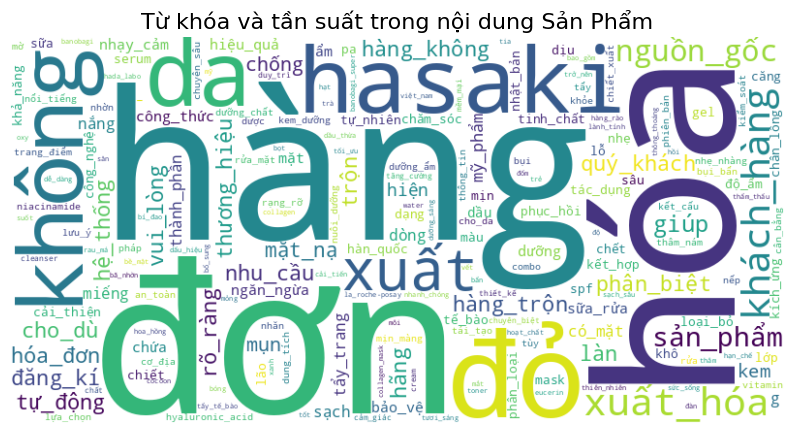

In [42]:
%matplotlib inline
# Trực quan hóa 1: Từ khóa và Tần suất ---
# Tạo từ điển từ và đếm tần suất
word_freq = {}
for text in content_gem_re:
    for word in text:
        word_freq[word] = word_freq.get(word, 0) + 1

# Trực quan hóa bằng WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Từ khóa và tần suất trong nội dung Sản Phẩm", fontsize=16)
plt.show()

In [43]:
df2.columns

Index(['ma_san_pham', 'ten_san_pham', 'gia_ban', 'gia_goc', 'phan_loai',
       'mo_ta', 'rating', 'Content', 'Content_wt'],
      dtype='object')

In [84]:
# Hàm đề xuất sản phẩm
def get_recommendations(query, by_name=False, content_data=None, product_data=None, stop_words=None, top_n=5):
    # Kiểm tra DataFrame và các cột cần thiết
    required_columns = ['ma_san_pham', 'ten_san_pham', 'Content_wt']
    for col in required_columns:
        if col not in product_data.columns:
            raise ValueError(f"DataFrame 'product_data' không chứa cột '{col}'. Vui lòng kiểm tra tên cột.")
    
    # Tạo dictionary và corpus
    dictionary = corpora.Dictionary(content_gem_re)
    feature_cnt = len(dictionary.token2id)
    corpus = [dictionary.doc2bow(text) for text in content_gem_re]
    
    # Tạo TF-IDF model
    tfidf = models.TfidfModel(corpus)
    
    # Tạo sparse matrix similarity
    index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=feature_cnt)
    
    # Lấy index của sản phẩm dựa trên ID hoặc tên
    try:
        if not by_name:
            product_index = product_data[product_data['ma_san_pham'] == query].index[0]
        else:
            # Tìm tên sản phẩm chứa từ khóa
            matches = product_data[product_data['ten_san_pham'].str.contains(query, case=False, na=False)]
            if matches.empty:
                raise ValueError("Không tìm thấy sản phẩm nào chứa từ khóa đã cung cấp.")
            product_index = matches.index[0]
    except IndexError:
        raise ValueError("Không tìm thấy sản phẩm với thông tin đã cung cấp.")
    
    # Chuyển đổi nội dung thành vector sparse
    view_content = content_gem_re[product_index]
    kw_vector = dictionary.doc2bow(view_content)
    
    # Tính toán độ tương tự
    sim = index[tfidf[kw_vector]]
    
    # Sắp xếp theo mức độ tương tự
    sim_sort = sorted(enumerate(sim), key=lambda item: -item[1])
    
    # Lấy top_n sản phẩm liên quan nhất (bỏ qua sản phẩm đầu vào)
    recommended_indices = [item[0] for item in sim_sort if item[0] != product_index][:top_n]
    
    # Trả về thông tin sản phẩm 
    recommended_products = product_data.iloc[recommended_indices][['ma_san_pham', 'ten_san_pham', 'gia_ban', 'gia_goc', 'rating']]
    return recommended_products

# Gợi ý theo ID sản phẩm
# Bắt đầu đo thời gian
start_time = time.time()
recommendations_by_id = get_recommendations(
    query=205100137, 
    by_name=False, 
    content_data=df2['Content_wt'], 
    product_data=df2, 
    stop_words=stop_words, 
    top_n=5
)

# Gợi ý theo tên sản phẩm
product_name = "Nước tẩy trang"
recommendations_by_name = get_recommendations(
    query=product_name, 
    by_name=True, 
    content_data=df2['Content_wt'], 
    product_data=df2, 
    stop_words=stop_words, 
    top_n=5
)
end_time = time.time()
execution_time = end_time - start_time

# In kết quả
print("Gợi ý sản phẩm theo ID: 205100137")
print(recommendations_by_id.to_string())

print(f"\nGợi ý theo tên sản phẩm '{product_name}':")
print(recommendations_by_name.to_string())
print(f"Thời gian thực thi thuật toán: {execution_time:.2f} giây")

Gợi ý sản phẩm theo ID: 205100137
     ma_san_pham                                              ten_san_pham  gia_ban   gia_goc  rating
9      205100146      Nước Tẩy Trang L'Oreal Làm Sạch Sâu Trang Điểm 400ml   174000  269000.0     4.7
26     205100136  Nước Tẩy Trang L'Oreal Dưỡng Ẩm Cho Da Thường, Khô 400ml   150000  229000.0     4.7
43     422206648                  Nước Tẩy Trang L'Oreal Căng Mịn Da 400ml   184000  269000.0     4.7
45     422204259      Nước Tẩy Trang L'Oreal Làm Sạch Sâu Cho Da Dầu 400ml   184000  269000.0     4.7
332    422211447          Combo 2 Nước Tẩy Trang L'Oreal Căng Mịn Da 400ml   341000  538000.0     4.7

Gợi ý theo tên sản phẩm 'Nước tẩy trang':
     ma_san_pham                                              ten_san_pham  gia_ban   gia_goc  rating
9      205100146      Nước Tẩy Trang L'Oreal Làm Sạch Sâu Trang Điểm 400ml   174000  269000.0     4.7
26     205100136  Nước Tẩy Trang L'Oreal Dưỡng Ẩm Cho Da Thường, Khô 400ml   150000  229000.0     4.7
43   

# Cosine_similarity

In [45]:
from numpy import dot
from numpy.linalg import norm
A = [1,2]
B = [2,2]
cos_sim = dot(A,B) / (norm(A)*norm(B))
print(cos_sim)

0.9486832980505138


In [46]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
# Vector hóa nội dung
vectorizer = TfidfVectorizer(analyzer='word', stop_words=stop_words)
tfidf_matrix = vectorizer.fit_transform(df2['Content_wt'])
# Tính toán độ tương đồng
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['cfo_đến'] not in stop_words.
  warnings.warn(


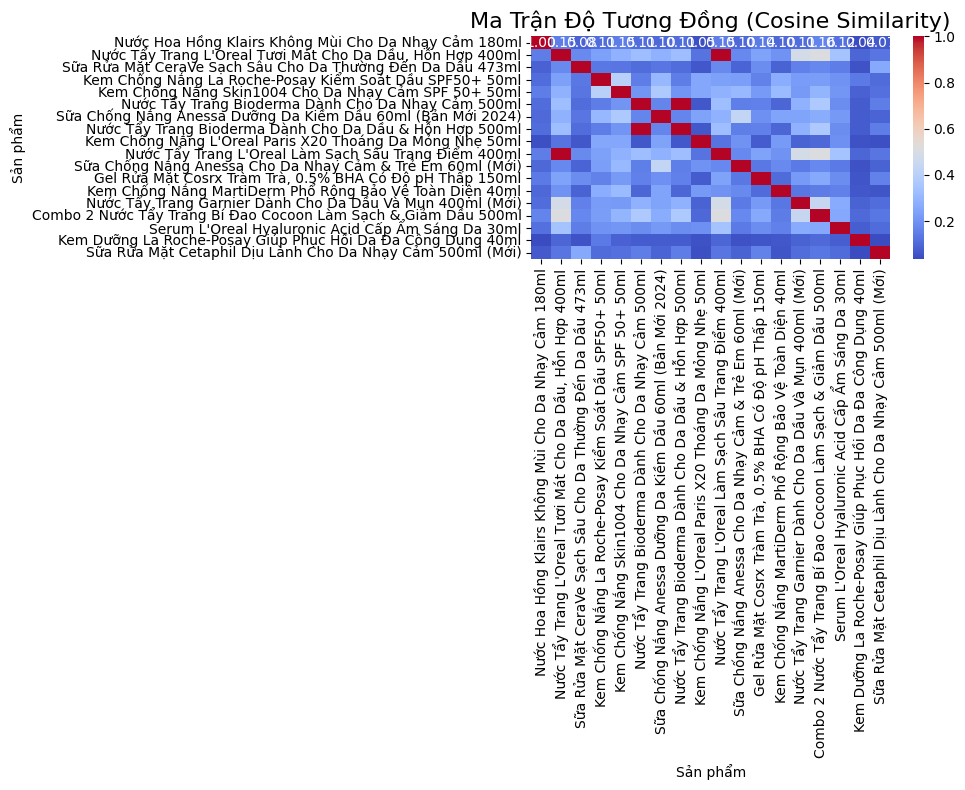

In [82]:
# Giới hạn số lượng sản phẩm hiển thị trong ma trận
num_products_to_display = 18  # Hiển thị 18 sản phẩm đầu tiên
cosine_sim_subset = cosine_sim[:num_products_to_display, :num_products_to_display]

# Trực quan hóa ma trận độ tương đồng
plt.figure(figsize=(10, 8))
sns.heatmap(
    cosine_sim_subset,
    cmap="coolwarm",
    annot=True,  # Hiển thị giá trị trong từng ô
    xticklabels=df2['ten_san_pham'][:num_products_to_display],
    yticklabels=df2['ten_san_pham'][:num_products_to_display],
    fmt=".2f"  # Định dạng giá trị số
)
plt.title("Ma Trận Độ Tương Đồng (Cosine Similarity)", fontsize=16)
plt.xlabel("Sản phẩm")
plt.ylabel("Sản phẩm")
plt.xticks(rotation=90)  # Xoay nhãn
plt.yticks(rotation=0)
plt.tight_layout()
# Lưu hình ảnh
output_cosine = "cosine_similarity_heatmap.png" 
plt.savefig(output_cosine, dpi=300, bbox_inches='tight')
plt.show()

<b> Nhận xét:  </b>  
Đa số ô ma trận có màu xanh nhạt đến xanh dương, cho thấy rằng phần lớn các sản phẩm trong tập dữ liệu có nội dung không tương đồng nhau.  
Các ô màu đỏ: Đại diện cho nhóm sản phẩm có nội dung gần giống hoặc tương tự

In [48]:
df_show = pd.DataFrame(cosine_sim)
df_show

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,1.000000,0.148727,0.083519,0.110259,0.145864,0.109901,0.100550,0.109901,0.045774,0.148727,...,0.129873,0.101371,0.059865,0.148727,0.083165,0.051409,0.070530,0.031683,0.119054,0.124555
1,0.148727,1.000000,0.175874,0.232500,0.281809,0.325315,0.288218,0.325315,0.125334,1.000000,...,0.286069,0.190789,0.061390,1.000000,0.169062,0.136356,0.260326,0.086171,0.206242,0.286515
2,0.083519,0.175874,1.000000,0.136020,0.127492,0.111688,0.129143,0.111688,0.061974,0.175874,...,0.132134,0.097036,0.040776,0.175874,0.072797,0.066361,0.113597,0.038449,0.125604,0.136972
3,0.110259,0.232500,0.136020,1.000000,0.401593,0.149193,0.306223,0.149193,0.253806,0.232500,...,0.238362,0.386932,0.032763,0.232500,0.338349,0.204999,0.126607,0.060404,0.200249,0.216403
4,0.145864,0.281809,0.127492,0.401593,1.000000,0.204014,0.365367,0.204014,0.254352,0.281809,...,0.245766,0.364890,0.047188,0.281809,0.397715,0.230546,0.136241,0.063918,0.223353,0.243967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.051409,0.136356,0.066361,0.204999,0.230546,0.081789,0.236876,0.081789,0.284662,0.136356,...,0.115525,0.197438,0.012339,0.136356,0.221986,1.000000,0.070727,0.036012,0.105497,0.117831
1196,0.070530,0.260326,0.113597,0.126607,0.136241,0.197287,0.144807,0.197287,0.062011,0.260326,...,0.144641,0.093660,0.063553,0.260326,0.095848,0.070727,1.000000,0.075927,0.102012,0.148801
1197,0.031683,0.086171,0.038449,0.060404,0.063918,0.051459,0.069291,0.051459,0.027024,0.086171,...,0.067478,0.054798,0.007500,0.086171,0.037642,0.036012,0.075927,1.000000,0.048264,0.067061
1198,0.119054,0.206242,0.125604,0.200249,0.223353,0.123680,0.191684,0.123680,0.135080,0.206242,...,0.210744,0.148435,0.029252,0.206242,0.144643,0.105497,0.102012,0.048264,1.000000,0.175012


#### Lưu ma trận kết quả consin và đọc lên khi cần đề xuất

In [49]:
# lưu cosine_sim
import pickle
with open('products_cosine_sim.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)

# mở và đọc file  cosine_sim_new
with open('products_cosine_sim.pkl', 'rb') as f:
    cosine_sim_new = pickle.load(f)


In [ ]:
def get_recommendations(df, ma_san_pham, cosine_sim=cosine_sim, nums=5):
    # Lấy chỉ số của sản phẩm với mã sản phẩm
    matching_indices = df.index[df2['ma_san_pham'] == ma_san_pham].tolist()
    if not matching_indices:
        print(f"No hotel found with ID: {ma_san_pham}")
        return pd.DataFrame()  # Trả về một data rỗng
    idx = matching_indices[0]

    # Lấy điểm tương đồng
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sắp xếp các sản phẩm dựa vào điểm tương đồng
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Lấy các sản phẩm tương tự (Bỏ qua chính nó)
    sim_scores = sim_scores[1:nums+1]

    # Lấy chỉ số sản phẩm
    product_indices = [i[0] for i in sim_scores]
    recommended = df2.iloc[product_indices][['ma_san_pham','ten_san_pham', 'gia_ban', 'gia_goc','rating']]

    # Trả kết quả
    return recommended

In [80]:

# Đo thời gian 
start_time = time.time()
# Gọi hàm
recommendations = get_recommendations(df2, 205100137, cosine_sim=cosine_sim_new, nums=5)
print(recommendations.to_string())

end_time = time.time()
execution_time = end_time - start_time
print(f"Thời gian thực thi thuật toán: {execution_time:.2f} giây")

     ma_san_pham                                              ten_san_pham  gia_ban   gia_goc  rating
9      205100146      Nước Tẩy Trang L'Oreal Làm Sạch Sâu Trang Điểm 400ml   174000  269000.0     4.7
26     205100136  Nước Tẩy Trang L'Oreal Dưỡng Ẩm Cho Da Thường, Khô 400ml   150000  229000.0     4.7
43     422206648                  Nước Tẩy Trang L'Oreal Căng Mịn Da 400ml   184000  269000.0     4.7
45     422204259      Nước Tẩy Trang L'Oreal Làm Sạch Sâu Cho Da Dầu 400ml   184000  269000.0     4.7
332    422211447          Combo 2 Nước Tẩy Trang L'Oreal Căng Mịn Da 400ml   341000  538000.0     4.7
Thời gian thực thi thuật toán: 0.01 giây


# Kết Luận
Trong 2 thuật toán Gensim và Cosine_similarity thì chọn Cosine_similarity vì:  
cùng đề xuất ID:205100137 và tên sản phẩm: 'Nước tẩy trang' thì cho kết quả giống nhau  
nhưng thời gian thuật toán Cosine là 0.01 giây còn Gensim là 0.34 giây.Đây là dữ liệu  
có kích thước nhỏ nên phù hợp với Cosine_similarity,đó lựa chọn đơn giản và hiệu quả



